In [47]:
# Import packages
import os
import pandas as pd
import geopandas as gpd
from fiona.crs import from_epsg
from shapely.geometry import Point
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import shapely
plt.style.use('ggplot')
%matplotlib inline

1.. Find the census trck shape files online (American Fact Finder has them), http://www1.nyc.gov/ has them. The folder you should download is names nycb2010_16d. 
Load it as a geopandas file

In [30]:
shape_path = "PUIDATA/nycb2010_16d/nycb2010.shp"
ct_shape = GeoDataFrame.from_file(shape_path)

In [31]:
# a view of the shape file loaded as a geojson file will look like this. Notice the coordinates. They are in 
# epsg=2263 is US feet. You want to convert them in epsg=4326: lat/on . 
# Look at the notebook https://github.com/fedhere/PUI2016_fb55/blob/master/Lab9_SRK325/GeospatialAnalysis_CitiBike.ipynb
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,"POLYGON ((962269.1260375977 173705.5001831055,..."
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,"POLYGON ((964642.2676391602 161835.2651977539,..."
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,"POLYGON ((963363.1168212891 167356.3336181641,..."
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,"POLYGON ((960069.9965820312 161953.6936035156,..."
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,"POLYGON ((963023.891784668 158246.7521972656, ..."


In [34]:
ct_shape.crs = from_epsg(2263)

In [37]:
ct_shape['geometry'] = ct_shape['geometry'].to_crs(epsg = 4326)

In [38]:
ct_shape.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
0,50009001000,5,Staten Island,1000,000900,244589.603884,2508.948115,POLYGON ((-74.07920577013245 40.64343078374566...
1,50020011000,5,Staten Island,1000,002001,111006.286826,1345.886422,POLYGON ((-74.07061992438018 40.61085506705415...
2,50027001000,5,Staten Island,1000,002700,150406.766022,1703.381172,POLYGON ((-74.07524403910642 40.62600632452711...
3,50040001000,5,Staten Island,1000,004000,141296.561149,1511.173743,POLYGON ((-74.08708799689826 40.61116883123923...
4,50064001000,5,Staten Island,1000,006400,200784.983607,1978.243852,POLYGON ((-74.07643744511992 40.60100160655585...


2.. Extract only the Brooklyn shape polygons and convert the coordinates to lat/lon 

In [39]:
ct_latlon = ct_shape[ct_shape['BoroName'] == 'Brooklyn']

In [40]:
ct_latlon.head()

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
5037,30002001000,3,Brooklyn,1000,000200,208484.989566,2097.493132,POLYGON ((-74.00659158337982 40.65561273365177...
5038,30003011000,3,Brooklyn,1000,000301,63365.958361,1006.913933,POLYGON ((-73.99514512602698 40.69877384567194...
5039,30005011000,3,Brooklyn,1000,000501,116303.194723,1431.900698,POLYGON ((-73.99270830309769 40.69809925981345...
5040,30011001000,3,Brooklyn,1000,001100,54802.306859,951.657541,"POLYGON ((-73.98514306089652 40.6948851429698,..."
5041,30015001000,3,Brooklyn,1000,001500,79196.530872,1129.348482,POLYGON ((-73.98305147125492 40.69837793354038...


3.. Find the coordinates of CUSP: 1 MetroTech Brooklyn. Create a Point shapely geometry with the coordinates of CUSP

    shapely.geometry.Point()

In [44]:
#to install geopy, use: !pip install geopy 
geolocator = Nominatim()
location = geolocator.geocode("1 MetroTech NYC")
location

Location((40.6922339, -73.9872968, 0.0))

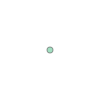

In [71]:
cusp = shapely.geometry.Point(location.longitude, location.latitude)
cusp

4.. Loop over the Brookly polygons (nearly 10000) and assess find in which geometry the polygon is contained

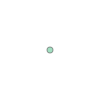

In [74]:
cusp

In [77]:
ct_latlon[ct_latlon.geometry.intersects(cusp)]

,BCTCB2010,BoroCode,BoroName,CB2010,CT2010,Shape_Area,Shape_Leng,geometry
7489,30011001007,3,Brooklyn,1007,001100,100347.777221,1304.015856,POLYGON ((-73.98627231669104 40.69219479463375...


In [78]:
ct_latlon[ct_latlon.geometry.intersects(cusp)].geometry

7489    POLYGON ((-73.98627231669104 40.69219479463375...
Name: geometry, dtype: object

In [83]:
print('CUSP is contained in:' + str(ct_latlon[ct_latlon.geometry.intersects(cusp)].geometry)[5:])

CUSP is contained in:   POLYGON ((-73.98627231669104 40.69219479463375...
Name: geometry, dtype: object


5.. Plot one every 10 polygons of brooklyn (using the geopandas datafame method plot)
and overplot the locati`on of cusp as a point (using pylab.scatter)
Overplot also the census track that contains cusp in red (using the geopandas datafame method plot)

In [130]:
ct_latlon['marker'] = 0
ct_latlon['marker'][7489] = 1

/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/Xianbo/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


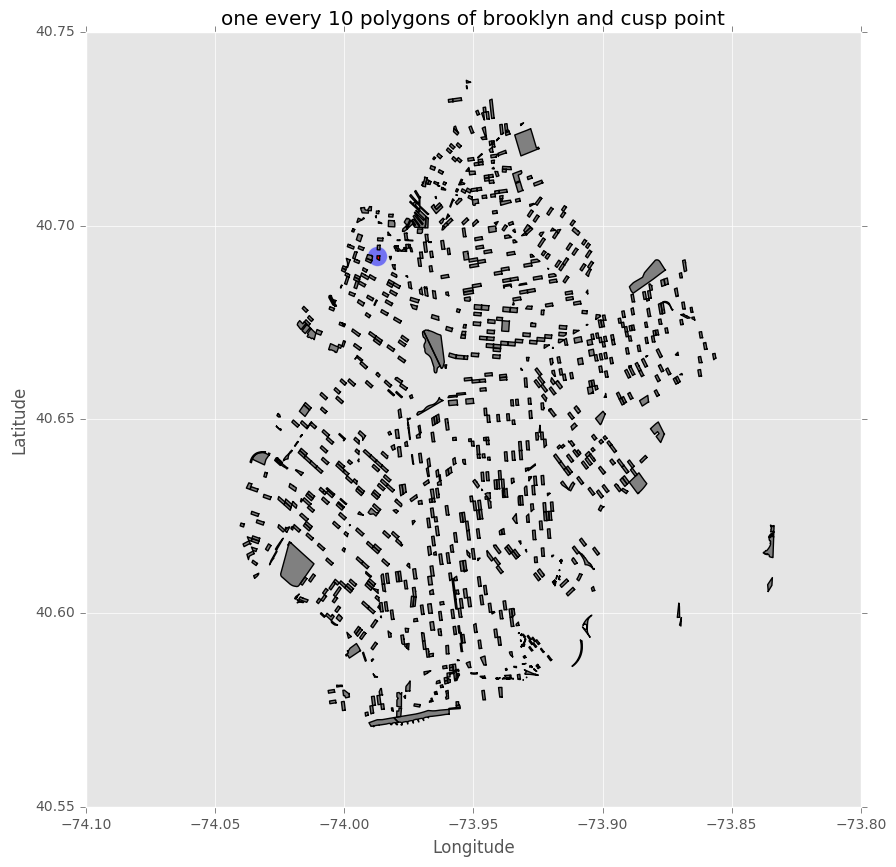

In [131]:
f, ax = plt.subplots(figsize=(10,10))
ct_latlon[::10].plot(column = 'marker',categorical = True, 
                     k = 9, color = 'grey', alpha = 1, ax = ax)
ct_latlon[ct_latlon.geometry.intersects(cusp)].plot(column = 'marker',categorical = True, 
                     k = 9, color = 'red', alpha = 1, ax = ax)
plt.scatter(location.longitude, location.latitude, alpha = 0.5, s = 200)
plt.title("one every 10 polygons of brooklyn and cusp point")
xlabel('Longitude')
ylabel('Latitude')